Крутов Андрей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm


In [2]:
%matplotlib inline

## Задание 1. Линейная регрессия

#### Данное задание является обязательным

Наша задача - предсказать уровень преступности на душу населения, используя переменные в наборе данных Boston. Уровень преступности на душу населения будет нашим ответом, а другие переменные - предикторами.

### Бостон датасет

Датасет содержит такие данные:

-crim -- уровень преступности на душу населения по городам.

-zn -- доля земель под жилую застройку, зонированных на участки более 25 000 кв. футов.

-indus -- доля акров, не относящихся к розничной торговле, на город.

-chas -- фиктивная переменная реки Чарльз (= 1, если участок ограничивает реку; 0 в противном случае).

-nox -- концентрация оксидов азота (частей на 10 млн).

-rm -- среднее количество комнат в доме.

-age -- доля занятых владельцами участков, построенных до 1940 года.

-dis -- среднее расстояние до пяти бостонских центров занятости.

-rad -- индекс доступности радиальных магистралей.

-tax -- полная ставка налога на имущество за \ $ 10,000.

-ptratio -- соотношение учеников и учителей по городам.

-lstat -- более низкий статус населения (в процентах).

-medv -- медианная стоимость домов, занимаемых владельцами, за 1000 долларов.


Sources:
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [3]:
params = {
    'crim': 'уровень преступности на душу населения по городам',
    'zn': 'доля земель под жилую застройку, зонированных на участки более 25 000 кв. футов',
    'indus': 'доля акров, не относящихся к розничной торговле, на город',
    'chas': 'фиктивная переменная реки Чарльз',
    'nox': 'концентрация оксидов азота (частей на 10 млн)',
    'rm': 'среднее количество комнат в доме',
    'age': 'доля занятых владельцами участков, построенных до 1940 года',
    'dis': 'среднее расстояние до пяти бостонских центров занятости',
    'rad': 'индекс доступности радиальных магистралей',
    'tax': 'полная ставка налога на имущество за $ 10,000',
    'ptratio': 'соотношение учеников и учителей по городам',
    'lstat': 'более низкий статус населения (в процентах)',
    'medv': 'медианная стоимость домов, занимаемых владельцами, за 1000 долларов'
}

In [4]:
data = pd.read_csv('d://robot_dreams/statistics for DS/boston.csv', index_col=0)

In [5]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Задание 1.1

- Для каждого предиктора подберите простую модель линейной регрессии, чтобы предсказать ответ. 
- Опишите свои результаты. 
- В какой из моделей существует статистически значимая связь между предиктором и ответом? 
- Создайте несколько графиков, подтверждающих ваши утверждения.

In [6]:
cols = data.columns[1:]#названия предикторов без учета целевой переменной
cols

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [7]:
y = data['crim']# целевая переменная
preds = []#список для важных предикторов

for colname in cols:
    
    X = data[colname]
    X = sm.add_constant(X)#добавляем фиктивный признак
         
    model = sm.OLS(y,X)#используем метод наименьших квадратов
    result = model.fit()
    
    if result.fvalue >= 1:#вводим порог для F-статистики
        #print('Уровень преступности зависит от параметра {}'.format(colname))
        print(colname)
        print(result.summary())
        print('')
        print('Уровень преступности зависит от {}'.format(params[colname]))
        print('___________________________________________________________________')
        print('')
        preds.append(colname)


zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           5.51e-06
Time:                        15:32:15   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     10.675      

In [8]:
preds

['zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat',
 'medv']

Построим графики зависимости уровня преступности от данных параметров

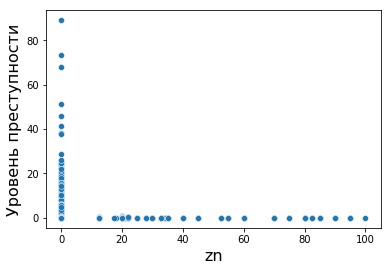

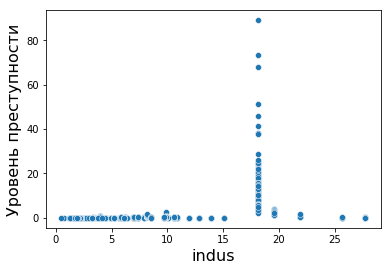

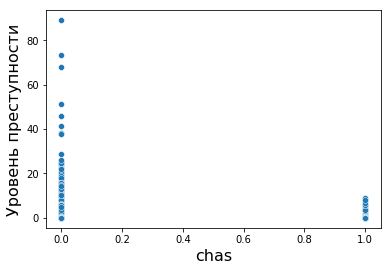

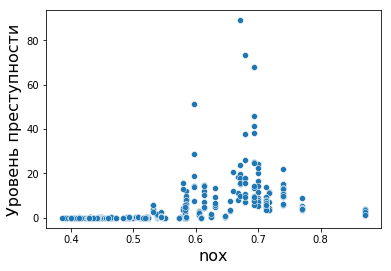

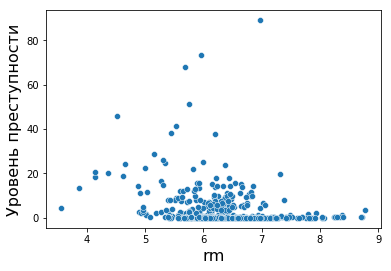

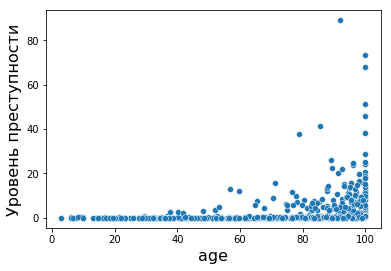

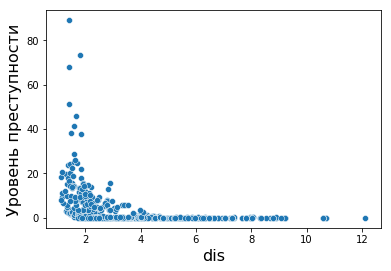

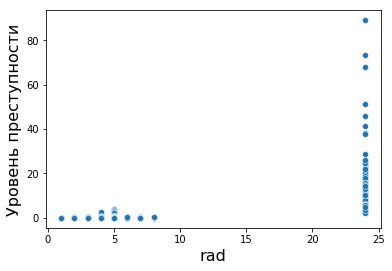

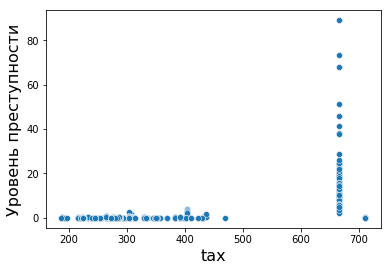

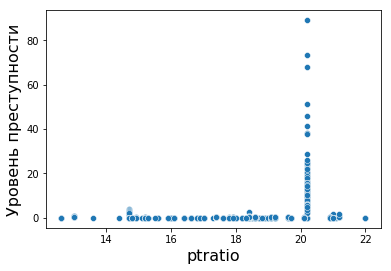

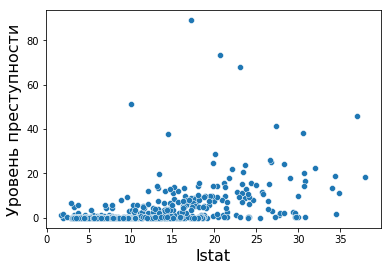

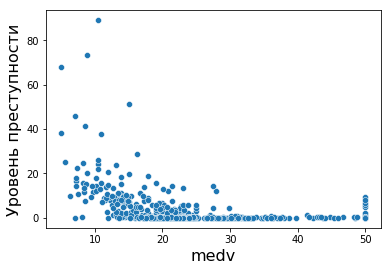

In [9]:
for i in preds:
    fig, ax = plt.subplots()
    sns.scatterplot(data=data, x=i, y='crim')
    ax.set_xlabel(i,size=16)
    ax.set_ylabel('Уровень преступности',size=16)

Из графиков линейная зависимость между уровнем преступности и указанными параметрами не прослеживается. Скорее всего это связано с низким качеством модели, так как для всех выбранных параметров $R^2$ не превышает 0.4.

### Задание 1.2

- Подберите модель множественной регрессии, чтобы предсказать ответ с использованием всех предикторов. 
- Опишите свои результаты. 
- Для каких предикторов мы можем отклонить основную гипотезу $H_0: \beta_j = 0$?

In [10]:
y = data['crim']#целевая переменная
X = data.drop('crim', axis=1)#данные без целевой переменной

In [11]:
X = sm.add_constant(X)

In [12]:
model = sm.OLS(y,X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           2.03e-56
Time:                        15:34:57   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

In [13]:
np.round(result.pvalues,3) < 0.05

const      False
zn          True
indus      False
chas       False
nox        False
rm         False
age        False
dis         True
rad         True
tax        False
ptratio    False
lstat      False
medv        True
dtype: bool

In [14]:
for pval in result.pvalues:
    if pval < 0.05:
        print(result.pvalues[result.pvalues == pval].index[0])

zn
dis
rad
medv


Значение F-статистики, мало, что говорит о слабой связи между целевой переменной и предикторами. Значение R2 меньше 0.5, значит полученная модель недостаточно хорошо описывает данные. Возможно, требуется изучение предикторов на предмет их корреляции между собой. 

Исходя из полученных резульатов, мы можем сказать о том, что для всех параметров кроме zn, dis, rad, medv мы можем отклонить нулевую гипотезу.

### Задание 1.3

- Как ваши результаты из первой задачи связаны с вашими результатами из второй задачи? 
- Создайте график, отображающий коэффициенты одномерной регрессии на оси x и соответсвующие коэффициенты множественной регрессии на оси y. То есть каждый предиктор отображается как одна точка на графике. Его коэффициент в простой модели линейной регрессии показан на абсциссе, а его оценка коэффициента в модели множественной линейной регрессии показана на ординате.

Полученные результаты совпадают с пердыдущими (п.1.1) только по параметру rad.

In [15]:
#Найдем коэффициенты одномерной регрессии для всех предикторов вне зависимости от F-статистики

y = data['crim']# целевая переменная
preds = []#список для предикторов
pred_coef = []#список для коэффициентов предикторов

for colname in cols:
    
    X = data[colname]
    X = sm.add_constant(X)#добавляем фиктивный признак
         
    model = sm.OLS(y,X)#используем метод наименьших квадратов
    result_1 = model.fit()
    
    pred_coef.append(result_1.params[1])
x_coef = pred_coef

In [16]:
x_coef

[-0.07393497740412368,
 0.5097763311042306,
 -1.8927765508037577,
 31.24853120112291,
 -2.6840512241139476,
 0.1077862271395331,
 -1.5509016824100994,
 0.6179109273272013,
 0.02974225282276537,
 1.1519827870705872,
 0.5488047820623981,
 -0.363159922257603]

In [17]:
y = data['crim']#целевая переменная
X = data.drop('crim', axis=1)#данные без целевой переменной
X = sm.add_constant(X)
model = sm.OLS(y,X)
result = model.fit()
y_coef = result.params[1:]

In [18]:
result.params

const      13.778394
zn          0.045710
indus      -0.058350
chas       -0.825378
nox        -9.957587
rm          0.628911
age        -0.000848
dis        -1.012247
rad         0.612465
tax        -0.003776
ptratio    -0.304073
lstat       0.138801
medv       -0.220056
dtype: float64

In [19]:
y_coef.values

array([ 4.57100386e-02, -5.83501107e-02, -8.25377552e-01, -9.95758655e+00,
        6.28910662e-01, -8.48279066e-04, -1.01224674e+00,  6.12465311e-01,
       -3.77564652e-03, -3.04072757e-01,  1.38800597e-01, -2.20056359e-01])

Text(0, 0.5, 'Множественная регрессия')

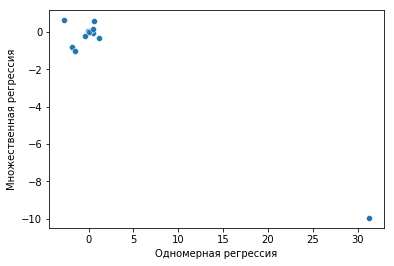

In [20]:
fig, ax = plt.subplots()
sns.scatterplot(x=x_coef, y=y_coef.values)

ax.set_xlabel('Одномерная регрессия',size=10)
ax.set_ylabel('Множественная регрессия',size=10)


Очень сильно отличается коэффициент перед предиктором chas: от 31 в случае одномерной регрессии до -9 в случае множественной

### Задание 1.4

Есть ли доказательства нелинейной связи между какими-либо предикторами и ответом? Чтобы ответить на этот вопрос, обучите для каждого предиктора X модель до 3-ей степени, то есть $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3$

In [22]:
y = data['crim']# целевая переменная  
preds = []#список для предикторов

for colname in cols:
    
    X = pd.DataFrame(data[colname])
    
    X2 = '{}^2'.format(colname)#квадрат
    
    X[X2] = X[colname] * X[colname]
    
    X3 = '{}^3'.format(colname)#третья степень
    X[X3] = X[colname] * X[colname] * X[colname]
    
    X = sm.add_constant(X)#добавляем фиктивный признак
         
    model = sm.OLS(y,X)#используем метод наименьших квадратов
    result = model.fit()
    if result.fvalue >= 1:#ограничение на F-статистику
        print('')
        print(colname)
        print(result.summary())
        print('________________________')
        print('')


zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.28e-06
Time:                        15:37:10   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461      0.433     11.192     


lstat
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.35e-26
Time:                        15:37:10   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2010      2.029      0.592  

Предиктор age имеет статистически значимую второую степень (превая и третья не дают вклада).  
Предиктор zn имеет статисчтиески значимые первые две степени
Предкиторы indus, nox, dis, ptratio, medv имеют статистически значимые три степени.